In [1]:
from __future__ import absolute_import, division, print_function

# Tensorflow and Keras 
import tensorflow as tf 
from tensorflow import keras

# Helper Libraries 
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

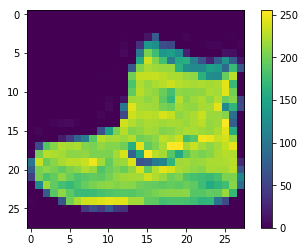

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

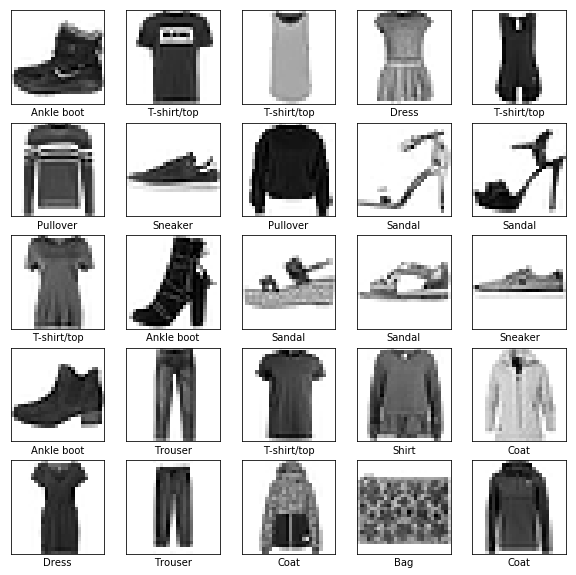

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
            

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4922 - accuracy: 0.8263
Epoch 2/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3745 - accuracy: 0.8650s - loss: 0.3765 - 
Epoch 3/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3360 - accuracy: 0.8766
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3125 - accuracy: 0.8858
Epoch 5/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2939 - accuracy: 0.8921


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.3603 - accuracy: 0.8708

Test accuracy: 0.8708


In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([3.3429187e-06, 9.1537897e-09, 1.2220556e-07, 4.4251607e-08,
       2.0391859e-07, 1.8123210e-03, 2.3482114e-06, 1.7186505e-01,
       7.2587613e-06, 8.2630926e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)
    
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
        

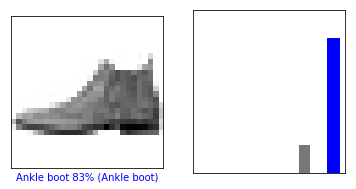

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

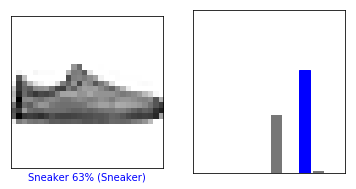

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

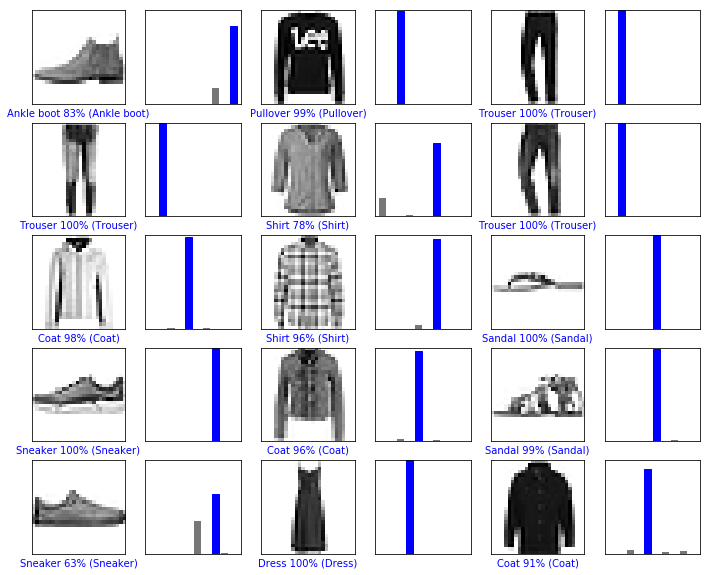

In [25]:
# Plot first X images with true labels and predicted labels
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [26]:
# Get an image
img = test_images[0]
print(img.shape)    


(28, 28)


In [27]:
# Add the image to a batch 
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)

In [29]:
print(predictions_single)

[[3.3429221e-06 9.1538075e-09 1.2220568e-07 4.4251607e-08 2.0391896e-07
  1.8123228e-03 2.3482114e-06 1.7186505e-01 7.2587545e-06 8.2630926e-01]]


In [30]:
plot_value_array(0, predictions_single, test_labels,)
- = plt.xticks(range(10), class_names, rotation=45)

SyntaxError: invalid syntax (<ipython-input-30-426f180ab1f6>, line 2)